In [30]:
!pip install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 5.6 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import tensorflow_hub as hub
from imblearn.over_sampling import RandomOverSampler

In [2]:
df=pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


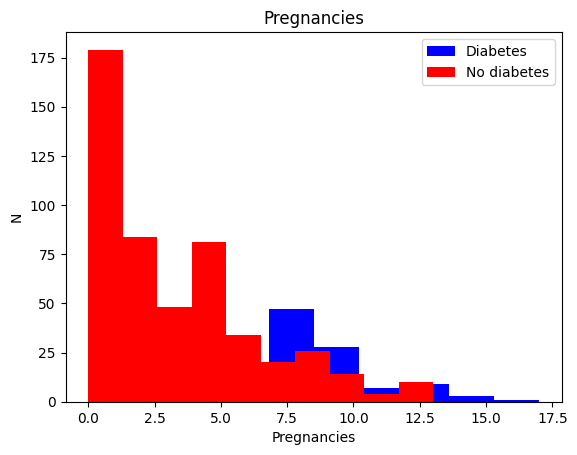

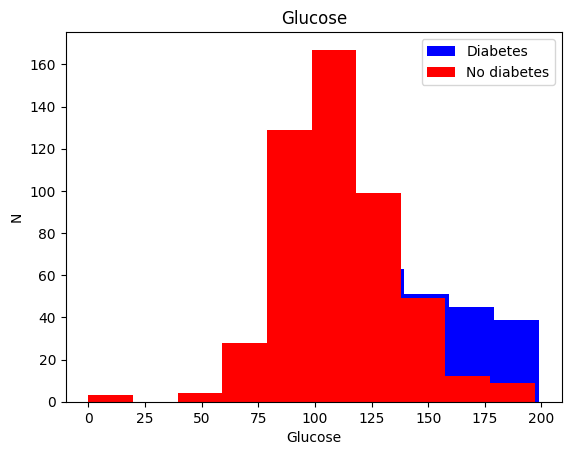

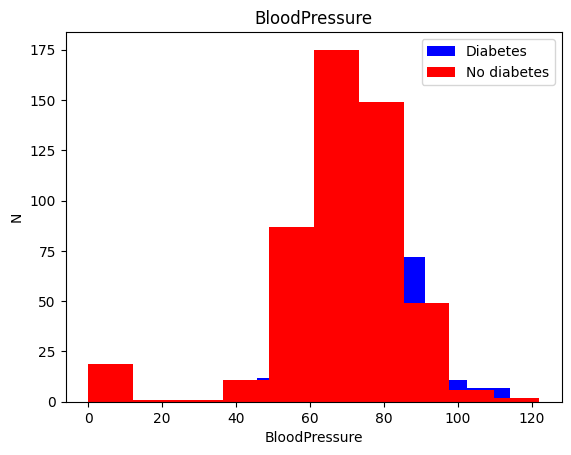

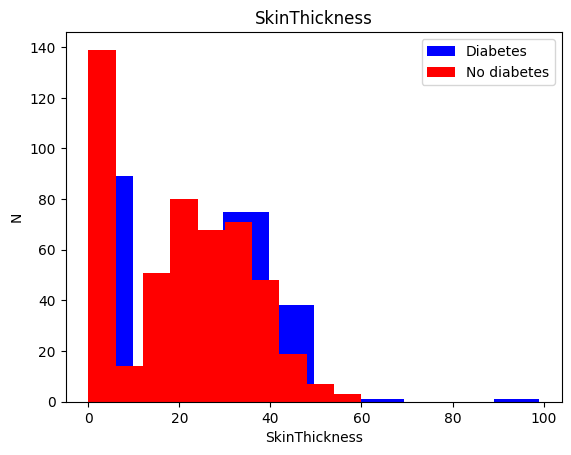

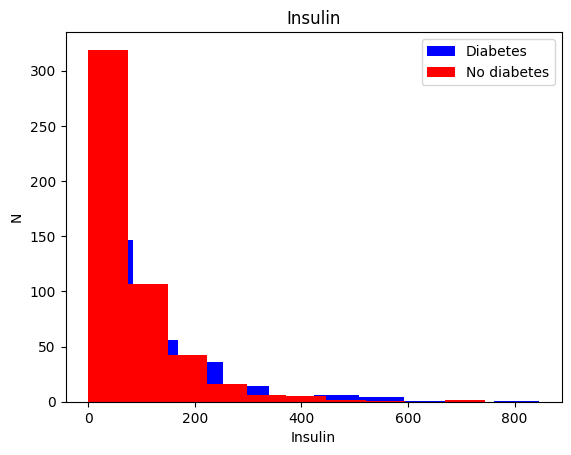

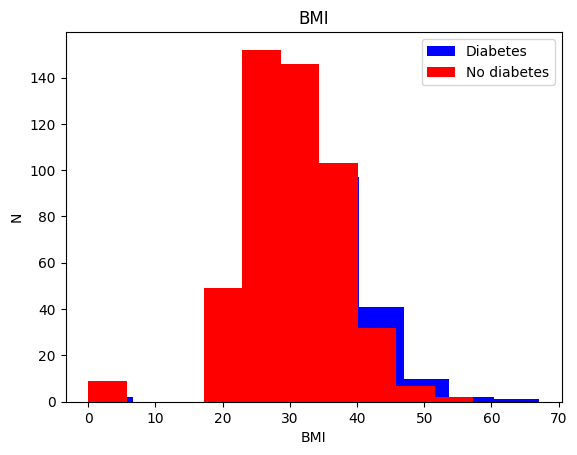

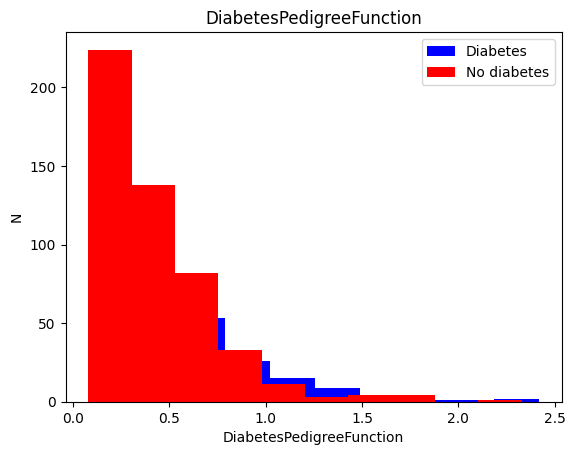

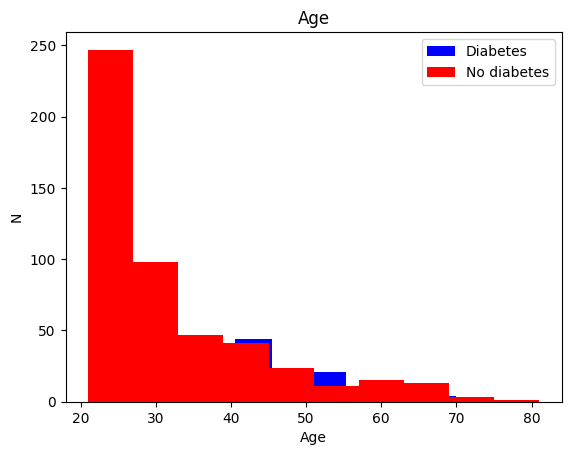

In [9]:
for i in range(len(df.columns[:-1])):
  label=df.columns[i]
  plt.hist(df[df['Outcome']==1][label], color='blue', label="Diabetes")
  plt.hist(df[df['Outcome']==0][label], color='red', label="No diabetes")
  plt.title(label)
  plt.ylabel("N")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [12]:
X=df[df.columns[:-1]].values
y=df[df.columns[-1]].values

In [24]:
X.shape, y.shape

((768, 8), (768,))

In [22]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
data = np.hstack((X, np.reshape(y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

In [29]:
over = RandomOverSampler()
X, y = over.fit_resample(X, y)
data = np.hstack((X, np.reshape(y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

In [27]:
len(transformed_df[transformed_df["Outcome"]==1]), len(transformed_df[transformed_df["Outcome"]==0])

(268, 500)

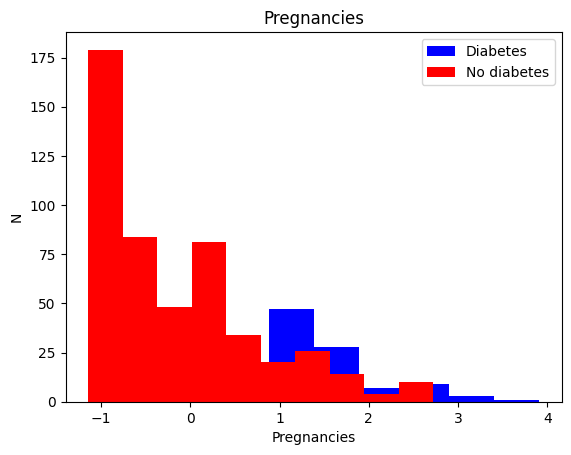

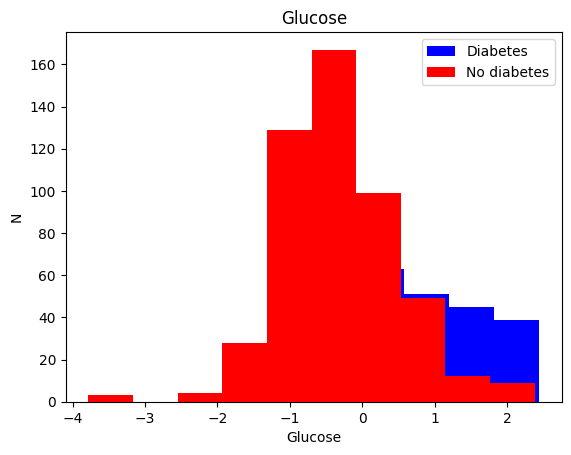

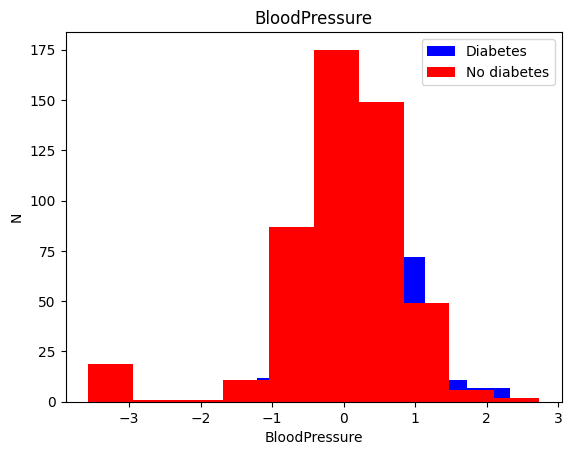

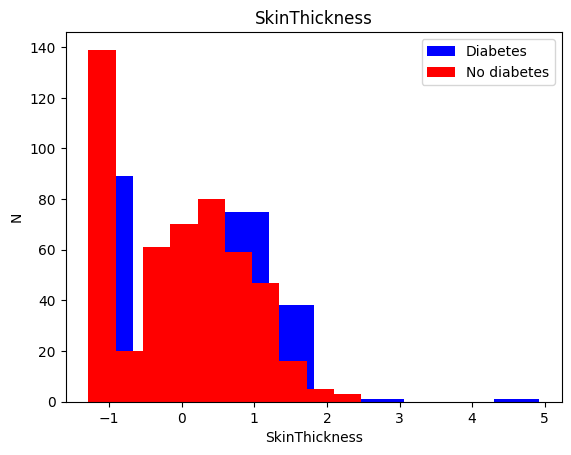

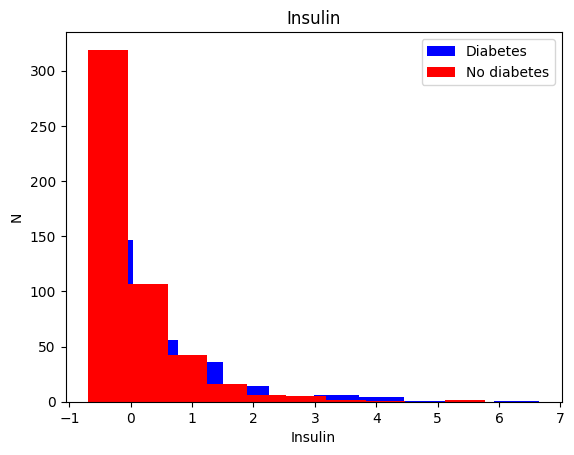

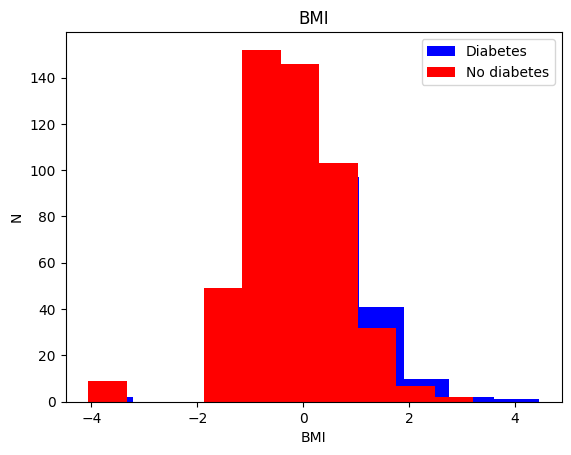

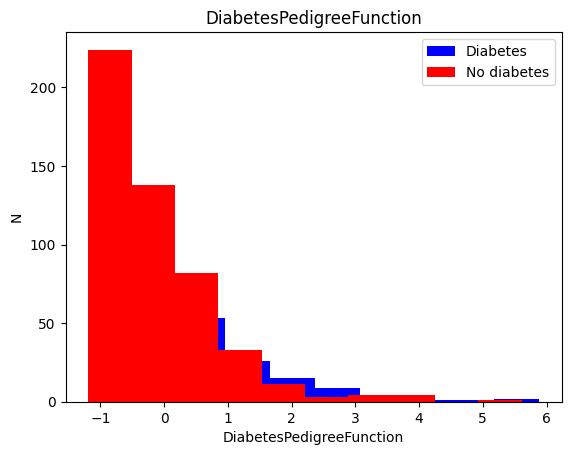

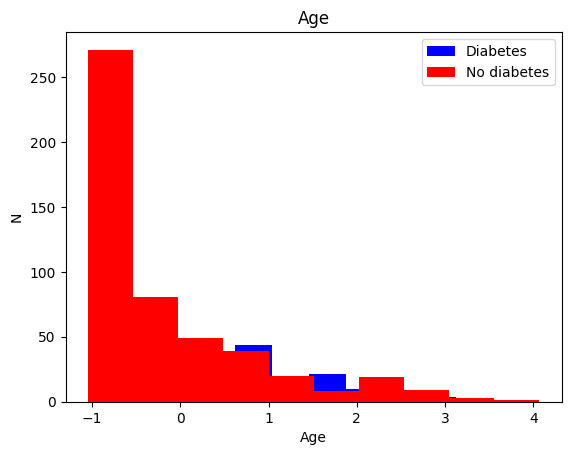

In [25]:
for i in range(len(df.columns[:-1])):
  label=df.columns[i]
  plt.hist(transformed_df[transformed_df['Outcome']==1][label], color='blue', label="Diabetes")
  plt.hist(transformed_df[transformed_df['Outcome']==0][label], color='red', label="No diabetes")
  plt.title(label)
  plt.ylabel("N")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [23]:
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [13]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [15]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

In [16]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(16, activation='relu'), # if x <= 0 --> 0, x > 0 --> x
                             tf.keras.layers.Dense(16, activation='relu'),
                             tf.keras.layers.Dense(1, activation="sigmoid")
])

In [17]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [33]:
model.evaluate(X_train, y_train)

15/15 [==============================] - 0s 2ms/step - loss: 0.5111 - accuracy: 0.7391


[0.5111220479011536, 0.739130437374115]

In [31]:
model.evaluate(X_valid, y_valid)

5/5 [==============================] - 0s 2ms/step - loss: 0.6301 - accuracy: 0.7013


[0.6300545930862427, 0.701298713684082]

In [32]:
model.fit(X_train, y_train, batch_size=16, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
29/29 [==============================] - 0s 4ms/step - loss: 0.5943 - accuracy: 0.6957 - val_loss: 0.6397 - val_accuracy: 0.6623
Epoch 2/20
29/29 [==============================] - 0s 3ms/step - loss: 0.6155 - accuracy: 0.6935 - val_loss: 0.6696 - val_accuracy: 0.6623
Epoch 3/20
29/29 [==============================] - 0s 3ms/step - loss: 0.6154 - accuracy: 0.7022 - val_loss: 0.6319 - val_accuracy: 0.6623
Epoch 4/20
29/29 [==============================] - 0s 3ms/step - loss: 0.6010 - accuracy: 0.7022 - val_loss: 0.6183 - val_accuracy: 0.7078
Epoch 5/20
29/29 [==============================] - 0s 3ms/step - loss: 0.5761 - accuracy: 0.6957 - val_loss: 0.6102 - val_accuracy: 0.7013
Epoch 6/20
29/29 [==============================] - 0s 3ms/step - loss: 0.5556 - accuracy: 0.7304 - val_loss: 0.6152 - val_accuracy: 0.6688
Epoch 7/20
29/29 [==============================] - 0s 3ms/step - loss: 0.5807 - accuracy: 0.7239 - val_loss: 0.6036 - val_accuracy: 0.6753
Epoch 8/20
29/29 [==